In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [2]:
application_train = pd.read_csv("application_train.csv")
application_test = pd.read_csv("application_test.csv")

In [3]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='TARGET', ylabel='count'>

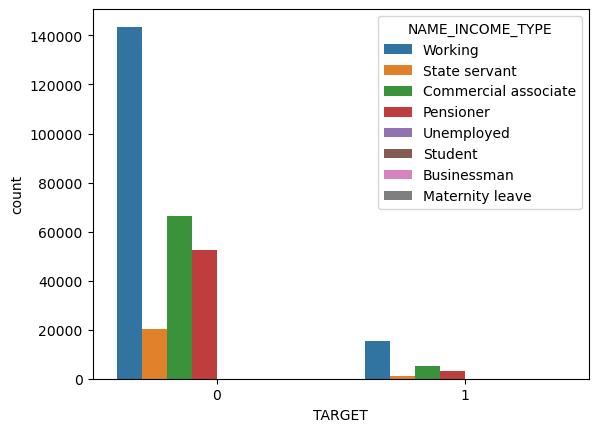

In [4]:
sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=application_train)

<Axes: xlabel='TARGET', ylabel='count'>

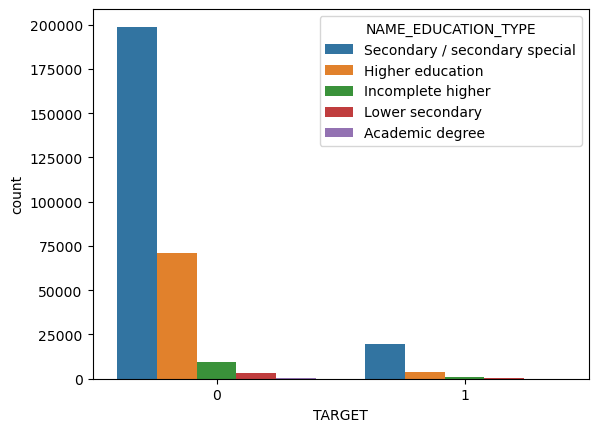

In [5]:
sns.countplot(x='TARGET',hue='NAME_EDUCATION_TYPE',data=application_train)

<Axes: xlabel='TARGET', ylabel='count'>

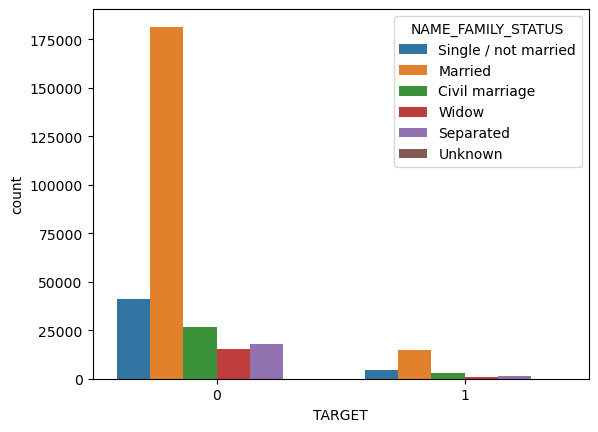

In [6]:
sns.countplot(x='TARGET',hue='NAME_FAMILY_STATUS',data=application_train)

<Axes: xlabel='TARGET', ylabel='count'>

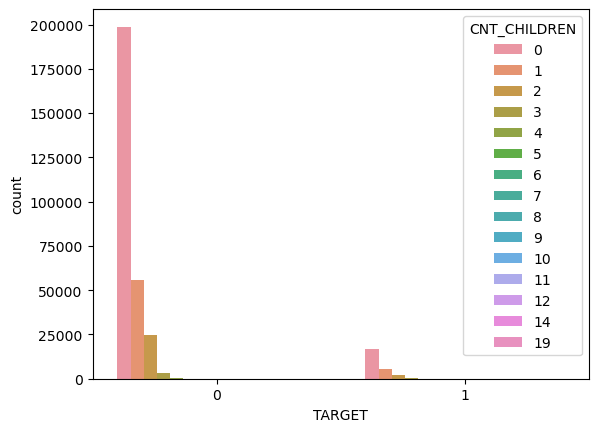

In [15]:
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=application_train)

In [7]:
application_train["CODE_GENDER"] = application_train["CODE_GENDER"].astype('category')
application_train["CODE_GENDER"] = application_train["CODE_GENDER"].cat.codes
application_train["FLAG_OWN_CAR"] = application_train["FLAG_OWN_CAR"].astype('category')
application_train["FLAG_OWN_CAR"] = application_train["FLAG_OWN_CAR"].cat.codes
application_train["FLAG_OWN_REALTY"] = application_train["FLAG_OWN_REALTY"].astype('category')
application_train["FLAG_OWN_REALTY"] = application_train["FLAG_OWN_REALTY"].cat.codes
application_train["NAME_CONTRACT_TYPE"] = application_train["NAME_CONTRACT_TYPE"].astype('category')
application_train["NAME_CONTRACT_TYPE"] = application_train["NAME_CONTRACT_TYPE"].cat.codes
application_train["NAME_TYPE_SUITE"] = application_train["NAME_TYPE_SUITE"].astype('category')
application_train["NAME_TYPE_SUITE"] = application_train["NAME_TYPE_SUITE"].cat.codes
application_train["OCCUPATION_TYPE"] = application_train["OCCUPATION_TYPE"].astype('category')
application_train["OCCUPATION_TYPE"] = application_train["OCCUPATION_TYPE"].cat.codes
application_train["NAME_INCOME_TYPE"] = application_train["NAME_INCOME_TYPE"].astype('category')
application_train["NAME_INCOME_TYPE"] = application_train["NAME_INCOME_TYPE"].cat.codes
application_train["NAME_EDUCATION_TYPE"] = application_train["NAME_EDUCATION_TYPE"].astype('category')
application_train["NAME_EDUCATION_TYPE"] = application_train["NAME_EDUCATION_TYPE"].cat.codes
application_train["NAME_FAMILY_STATUS"] = application_train["NAME_FAMILY_STATUS"].astype('category')
application_train["NAME_FAMILY_STATUS"] = application_train["NAME_FAMILY_STATUS"].cat.codes
application_train["NAME_HOUSING_TYPE"] = application_train["NAME_HOUSING_TYPE"].astype('category')
application_train["NAME_HOUSING_TYPE"] = application_train["NAME_HOUSING_TYPE"].cat.codes
application_train["WEEKDAY_APPR_PROCESS_START"] = application_train["WEEKDAY_APPR_PROCESS_START"].astype('category')
application_train["WEEKDAY_APPR_PROCESS_START"] = application_train["WEEKDAY_APPR_PROCESS_START"].cat.codes
application_train["ORGANIZATION_TYPE"] = application_train["ORGANIZATION_TYPE"].astype('category')
application_train["ORGANIZATION_TYPE"] = application_train["ORGANIZATION_TYPE"].cat.codes
application_train["FONDKAPREMONT_MODE"] = application_train["FONDKAPREMONT_MODE"].astype('category')
application_train["FONDKAPREMONT_MODE"] = application_train["FONDKAPREMONT_MODE"].cat.codes
application_train["HOUSETYPE_MODE"] = application_train["HOUSETYPE_MODE"].astype('category')
application_train["HOUSETYPE_MODE"] = application_train["HOUSETYPE_MODE"].cat.codes
application_train["WALLSMATERIAL_MODE"] = application_train["WALLSMATERIAL_MODE"].astype('category')
application_train["WALLSMATERIAL_MODE"] = application_train["WALLSMATERIAL_MODE"].cat.codes
application_train["EMERGENCYSTATE_MODE"] = application_train["EMERGENCYSTATE_MODE"].astype('category')
application_train["EMERGENCYSTATE_MODE"] = application_train["EMERGENCYSTATE_MODE"].cat.codes

In [8]:
application_train = application_train.dropna(axis=1)
application_train.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 61, dtype: int64

In [9]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,1,0,1,0,202500.0,406597.5,6,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,6,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,6,...,0,0,0,0,0,0,0,0,0,0


In [10]:
x=application_train.drop(['TARGET','SK_ID_CURR'],axis=1)
y=application_train['TARGET']

In [11]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=.30,random_state=1)
x_test=application_test.drop(['SK_ID_CURR'],axis=1)

In [12]:
lr = LogisticRegression(max_iter=3000)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_valid)

lr_train_score = lr.score(x_train, y_train)
lr_test_score= lr.score(x_valid, y_valid)

lr_acc = accuracy_score(y_pred_lr,y_valid)

print('LogisticRegressionModel Train Score is : ' , lr_train_score)
print('LogisticRegressionModel Test Score is : ' , lr_test_score)
print('LogisticRegressionModel accuracy is : ', lr_acc)

LogisticRegressionModel Train Score is :  0.9193615074074246
LogisticRegressionModel Test Score is :  0.9190604201443839
LogisticRegressionModel accuracy is :  0.9190604201443839


In [13]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_valid)

dt_train_score = dt.score(x_train, y_train)
dt_test_score= dt.score(x_valid, y_valid)
dt_acc = accuracy_score(y_pred_dt,y_valid)

print('DecisionTreeClassifier Train Score is : ' , dt_train_score)
print('DecisionTreeClassifier Test Score is : ' , dt_test_score)
print('DecisionTreeClassifier accuracy is : ', dt_acc)

DecisionTreeClassifier Train Score is :  1.0
DecisionTreeClassifier Test Score is :  0.8429011208186095
DecisionTreeClassifier accuracy is :  0.8429011208186095


Text(0, 0.5, 'Score')

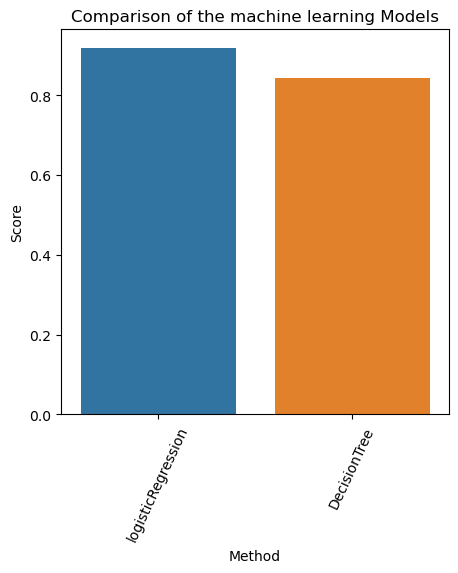

In [14]:


name = ['logisticRegression','DecisionTree']
auc = [0.91906,0.844169]
plt.figure(figsize=(5,5))
sns.barplot(x=name,y=auc)
plt.xticks(rotation=65)
plt.title('Comparison of the machine learning Models')
plt.xlabel('Method')
plt.ylabel('Score')